In [1]:
import asyncio
from enum import Enum

from bluesky import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count
from ophyd_async.core import Device, init_devices
from ophyd_async.epics.core import (
    epics_signal_rw,
)

loop = asyncio.get_event_loop()
bec = BestEffortCallback()
RE = RunEngine({})

In [2]:
import os

os.chdir("/scratch/wvx67826/p99_bluesky/src/")

In [3]:
from p99_bluesky.devices.p99.sample_stage import SampleAngleStage
from p99_bluesky.devices.stages import ThreeAxisStage


In [4]:
with init_devices():
    sample_angle_stage = SampleAngleStage('BL99P-MO-STAGE-01:',name = "sample_angle_stage")
#result = asyncio.create_task(x.connect())

In [5]:
result1 = asyncio.create_task(sample_angle_stage.theta.user_setpoint.get_value())
result2 = asyncio.create_task(sample_angle_stage.roll.read())
result3 = asyncio.create_task(sample_angle_stage.pitch.read())

In [6]:
print(result1,"\n",result2,"\n",result3,"\n", )


<Task finished name='Task-28' coro=<SignalR.get_value() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/signal.py:28> result=0.11> 
 <Task finished name='Task-29' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_angle_stage-roll': {'alarm_severity': 0, 'timestamp': 1713795070.808041, 'value': 0.11}}> 
 <Task finished name='Task-30' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_angle_stage-pitch': {'alarm_severity': 0, 'timestamp': 1713795070.808041, 'value': 0.11}}> 



In [7]:
asyncio.all_tasks(sample_angle_stage.roll.set(0.12))
asyncio.all_tasks(sample_angle_stage.theta.set(0.21))
asyncio.all_tasks(sample_angle_stage.pitch.set(0.11))

set()

In [8]:
print (result1,"\n\n",result2 ,"\n\n",result3)

<Task finished name='Task-28' coro=<SignalR.get_value() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/signal.py:28> result=0.11> 

 <Task finished name='Task-29' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_angle_stage-roll': {'alarm_severity': 0, 'timestamp': 1713795070.808041, 'value': 0.11}}> 

 <Task finished name='Task-30' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_angle_stage-pitch': {'alarm_severity': 0, 'timestamp': 1713795070.808041, 'value': 0.11}}>




Transient Scan ID: 1     Time: 2024-04-23 11:20:09
Persistent Unique Scan ID: 'f2a9f7f5-5b81-42d7-81b5-02c539ccc36c'
New stream: 'primary'
+-----------+------------+-------------------------+--------------------------+--------------------------+
|   seq_num |       time | sample_angle_stage-roll | sample_angle_stage-pitch | sample_angle_stage-theta |
+-----------+------------+-------------------------+--------------------------+--------------------------+
|         1 | 11:20:09.9 |                   0.110 |                    0.110 |                    0.110 |
|         2 | 11:20:10.5 |                   0.110 |                    0.110 |                    0.110 |
|         3 | 11:20:11.0 |                   0.110 |                    0.110 |                    0.110 |
|         4 | 11:20:11.5 |                   0.110 |                    0.110 |                    0.110 |
|         5 | 11:20:12.1 |                   0.110 |                    0.110 |                    0.110 |
+--

('f2a9f7f5-5b81-42d7-81b5-02c539ccc36c',)

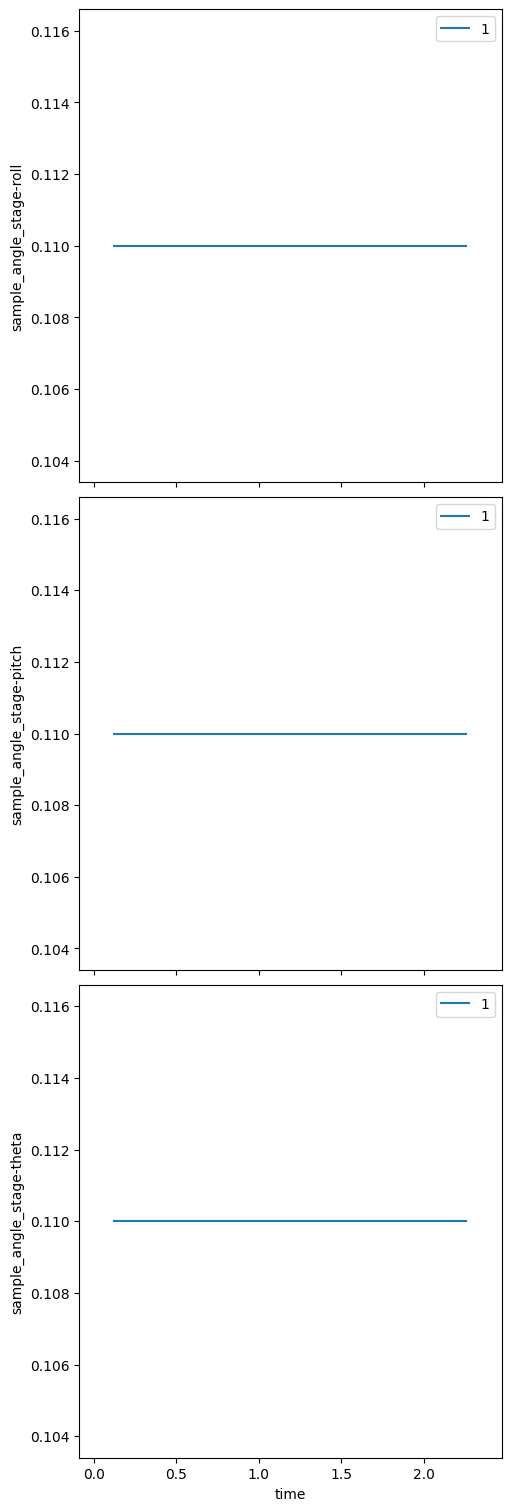

In [9]:
RE(count([sample_angle_stage.theta,sample_angle_stage.roll, sample_angle_stage.pitch],5),bec)

In [10]:
result1 = asyncio.create_task(sample_angle_stage.roll.read_configuration())
result2 = asyncio.create_task(sample_angle_stage.roll.read_configuration())
result3 = asyncio.create_task(sample_angle_stage.roll.read_configuration())

In [11]:
print (result1,"\n\n",result2 ,"\n\n",result3)

<Task finished name='Task-118' coro=<StandardReadable.read_configuration() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:58> result={'sample_angle...oll-motor_egu': {'alarm_severity': 0, 'timestamp': 1713867603.179117, 'value': 'deg'}}> 

 <Task finished name='Task-119' coro=<StandardReadable.read_configuration() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:58> result={'sample_angle...oll-motor_egu': {'alarm_severity': 0, 'timestamp': 1713867603.179117, 'value': 'deg'}}> 

 <Task finished name='Task-120' coro=<StandardReadable.read_configuration() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:58> result={'sample_angle...oll-motor_egu': {'alarm_severity': 0, 'timestamp': 1713867603.179117, 'value': 'deg'}}>


In [12]:
xyz_pv = 'BL99P-MO-STAGE-02:'

In [13]:
with init_devices():
    sample_xyz_stage =ThreeAxisStage(xyz_pv,"sample_xyz_stage")

In [14]:
sample_xyz_stage.x.setpoint = epics_signal_rw(float, xyz_pv + "X")
sample_xyz_stage.y.setpoint = epics_signal_rw(float, xyz_pv + "Y")
sample_xyz_stage.z.setpoint = epics_signal_rw(float, xyz_pv + "Z")
asyncio.create_task(sample_xyz_stage.x.connect())
asyncio.create_task(sample_xyz_stage.y.connect())
asyncio.create_task(sample_xyz_stage.z.connect())

<Task pending name='Task-170' coro=<Device.connect() running at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/device.py:61>>

In [15]:
result1 = asyncio.create_task(sample_xyz_stage.x.read())
result2 = asyncio.create_task(sample_xyz_stage.y.read())
result3 = asyncio.create_task(sample_xyz_stage.z.read())

In [16]:
print(result1,"\n",result2,"\n",result3,"\n", )

<Task finished name='Task-207' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_xyz_stage-x': {'alarm_severity': 0, 'timestamp': 1713544462.026615, 'value': 0.1}}> 
 <Task finished name='Task-208' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_xyz_stage-y': {'alarm_severity': 0, 'timestamp': 1713523982.943115, 'value': 1.0}}> 
 <Task finished name='Task-209' coro=<StandardReadable.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:68> result={'sample_xyz_stage-z': {'alarm_severity': 0, 'timestamp': 1713863967.087072, 'value': 0.30000000000000004}}> 



In [17]:
result1 = asyncio.create_task(sample_xyz_stage.x.read_configuration())
result2 = asyncio.create_task(sample_xyz_stage.y.read_configuration())
result3 = asyncio.create_task(sample_xyz_stage.z.read_configuration())

In [18]:
print(result1,"\n",result2,"\n",result3,"\n", )

<Task finished name='Task-216' coro=<StandardReadable.read_configuration() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:58> result={'sample_xyz_stage-x-units': {'alarm_severity': 0, 'timestamp': 1713544462.026615, 'value': 'mm'}, 'sample_xyz_stage-x-velocity': {'alarm_severity': 0, 'timestamp': 1713544462.026615, 'value': 1.8}}> 
 <Task finished name='Task-217' coro=<StandardReadable.read_configuration() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:58> result={'sample_xyz_stage-y-units': {'alarm_severity': 0, 'timestamp': 1713523982.943115, 'value': 'mm'}, 'sample_xyz_stage-y-velocity': {'alarm_severity': 0, 'timestamp': 1713523982.943115, 'value': 1.8}}> 
 <Task finished name='Task-218' coro=<StandardReadable.read_configuration() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/standard_readable.py:58> result={'sample_xyz_s



Transient Scan ID: 2     Time: 2024-04-23 11:20:37
Persistent Unique Scan ID: 'b1be5d2d-7b39-4161-bcb1-a9c7f0626c20'
New stream: 'primary'
+-----------+------------+--------------------+--------------------+--------------------+
|   seq_num |       time | sample_xyz_stage-x | sample_xyz_stage-z | sample_xyz_stage-y |
+-----------+------------+--------------------+--------------------+--------------------+
|         1 | 11:20:38.0 |              0.100 |              0.300 |              1.000 |
|         2 | 11:20:38.5 |              0.100 |              0.300 |              1.000 |
|         3 | 11:20:39.0 |              0.100 |              0.300 |              1.000 |
+-----------+------------+--------------------+--------------------+--------------------+
generator count ['b1be5d2d'] (scan num: 2)





('b1be5d2d-7b39-4161-bcb1-a9c7f0626c20',)

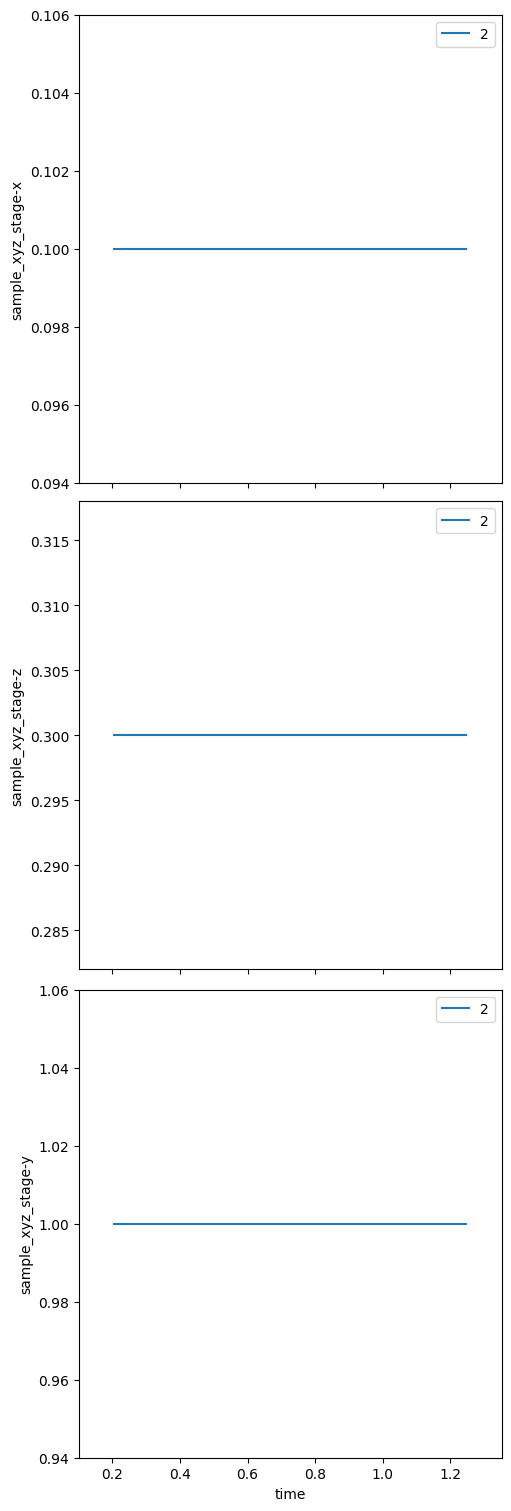

In [19]:
RE(count([sample_xyz_stage.x, sample_xyz_stage.y, sample_xyz_stage.z ],3),bec)

In [20]:
class p99StageSelections(str, Enum):
    Empty = ("Empty",)
    Mn5um = ("Mn 5um",)
    Fe = ("Fe (empty)",)
    Co5um = ("Co 5um",)
    Ni5um = ("Ni 5um",)
    Cu5um = ("Cu 5um",)
    Zn5um = ("Zn 5um",)
    Zr = ("Zr (empty)",)
    Mo = ("Mo (empty)",)
    Rh = ("Rh (empty)",)
    Pd = ("Pd (empty)",)
    Ag = ("Ag (empty)",)
    Cd25um = ("Cd 25um",)
    W = ("W (empty)",)
    Pt = ("Pt (empty)",)
    User = ("User",)

class FilterMotor(Device):
    def __init__(self, prefix: str, name: str):
        self.user_setpoint = epics_signal_rw(p99StageSelections, 'BL99P-MO-STAGE-02:MP:SELECT')
        super().__init__(name=name)

In [21]:
with init_devices():
    filterWheel =  FilterMotor('BL99P-MO-STAGE-02:MP:SELECT', "filterWheel")

In [22]:
result1= asyncio.gather(filterWheel.user_setpoint.set(p99StageSelections.Co5um))
result2 = asyncio.create_task(filterWheel.user_setpoint.read())

In [23]:
print(result1,"\n",result2,"\n" )

<_GatheringFuture finished result=[None]> 
 <Task finished name='Task-295' coro=<SignalR.read() done, defined at /scratch/wvx67826/myenv/lib/python3.11/site-packages/ophyd_async/core/signal.py:28> result={'filterWheel-user_setpoint': {'alarm_severity': 0, 'timestamp': 1713867676.347262, 'value': <GeneratedCho...5um: 'Co 5um'>}}> 

